In [1]:
import numpy as np
import xarray as xr

from envelope_approximation.stress_energy_tensor.surface_integration import bubble_data as _bubble_data
from envelope_approximation.utils import decompose_bubbles

# Setting up the bubbles


In [2]:
R = 1.
d = 1.2
bubble_data = _bubble_data(*decompose_bubbles((((0., 0., -d / 2) , R), ((0., 0., d / 2), R) )))
bubble_data

<xarray.Dataset>
Dimensions:         (n_b: 2, direction: 3)
Coordinates:
  * n_b             (n_b) int64 0 1
  * direction       (direction) <U1 'x' 'y' 'z'
Data variables:
    bubble_centers  (n_b, direction) float64 0.0 0.0 -0.6 0.0 0.0 0.6
    bubble_radii    (n_b) float64 1.0 1.0

# Setting up the k values

In [3]:
from itertools import product
from envelope_approximation.stress_energy_tensor.surface_integration import K_INDEX, CARTESIAN_DIRECTIONS, DIRECTION
k_0 = 2 * np.pi / (R + d / 2)
_k = np.linspace(k_0 / 10, k_0 * 10, 100)
_k_vecs = np.array([[0., 0., k_z] for k_z in _k])
k_vecs = xr.DataArray(dims=[K_INDEX, DIRECTION], 
                      coords={DIRECTION: CARTESIAN_DIRECTIONS, 
                              K_INDEX: np.arange(0., len(_k_vecs))},
                      data=_k_vecs)

In [4]:
k_vecs

<xarray.DataArray (n_k: 100, direction: 3)>
array([[ 0.        ,  0.        ,  0.39269908],
       [ 0.        ,  0.        ,  0.78539816],
       [ 0.        ,  0.        ,  1.17809725],
       [ 0.        ,  0.        ,  1.57079633],
       [ 0.        ,  0.        ,  1.96349541],
       [ 0.        ,  0.        ,  2.35619449],
       [ 0.        ,  0.        ,  2.74889357],
       [ 0.        ,  0.        ,  3.14159265],
       [ 0.        ,  0.        ,  3.53429174],
       [ 0.        ,  0.        ,  3.92699082],
       [ 0.        ,  0.        ,  4.3196899 ],
       [ 0.        ,  0.        ,  4.71238898],
       [ 0.        ,  0.        ,  5.10508806],
       [ 0.        ,  0.        ,  5.49778714],
       [ 0.        ,  0.        ,  5.89048623],
       [ 0.        ,  0.        ,  6.28318531],
       [ 0.        ,  0.        ,  6.67588439],
       [ 0.        ,  0.        ,  7.06858347],
       [ 0.        ,  0.        ,  7.46128255],
       [ 0.        ,  0.        ,  7.85398163],
...
       [ 0.        ,  0.        , 31.80862562],
       [ 0.        ,  0.        , 32.2013247 ],
       [ 0.        ,  0.        , 32.59402378],
       [ 0.        ,  0.        , 32.98672286],
       [ 0.        ,  0.        , 33.37942194],
       [ 0.        ,  0.        , 33.77212103],
       [ 0.        ,  0.        , 34.16482011],
       [ 0.        ,  0.        , 34.55751919],
       [ 0.        ,  0.        , 34.95021827],
       [ 0.        ,  0.        , 35.34291735],
       [ 0.        ,  0.        , 35.73561643],
       [ 0.        ,  0.        , 36.12831552],
       [ 0.        ,  0.        , 36.5210146 ],
       [ 0.        ,  0.        , 36.91371368],
       [ 0.        ,  0.        , 37.30641276],
       [ 0.        ,  0.        , 37.69911184],
       [ 0.        ,  0.        , 38.09181092],
       [ 0.        ,  0.        , 38.48451001],
       [ 0.        ,  0.        , 38.87720909],
       [ 0.        ,  0.        , 39.26990817]])
Coordinates:
  * direction  (direction) <U1 'x' 'y' 'z'
  * n_k        (n_k) float64 0.0 1.0 2.0 3.0 4.0 ... 95.0 96.0 97.0 98.0 99.0

# analytic computation

In [5]:
tv_energy = 1.
k = k_vecs.sel({'direction': 'z'})

In [6]:
import numpy as np
from numpy import cos, sin

I = 1j
pi = np.pi
e = np.exp

This was computed analytically using sage

In [7]:
def single_bubble_contribution(k):
    return 8 * np.pi * np.cos(k * d / 2) * (np.sin(k * R) - (k * R) * np.cos(k * R)) / (k ** 3)

In [8]:
def intersection_contribution(k):
    res = (pi*d*k - 2*(pi*R*k*cos(R*k) - pi*sin(R*k))*cos(1/2*d*k) - 2*(pi*R*k*sin(R*k) + pi*cos(R*k))*sin(1/2*d*k))/k**3
    return 2 * np.real(res)

In [9]:
analytic_integral = single_bubble_contribution(k) - intersection_contribution(k)

In [10]:
analytic_integral

<xarray.DataArray (n_k: 100)>
array([ 7.15180565e+00,  6.15037387e+00,  4.67464603e+00,  2.97027793e+00,
        1.30379729e+00, -9.15528602e-02, -1.05927034e+00, -1.54284507e+00,
       -1.58480404e+00, -1.30379729e+00, -8.57264113e-01, -4.00191374e-01,
       -5.04773973e-02,  1.31348454e-01,  1.44866366e-01,  3.67546269e-02,
       -1.22215349e-01, -2.62460625e-01, -3.35835032e-01, -3.25949323e-01,
       -2.47185928e-01, -1.34510178e-01, -2.86030350e-02,  3.83928333e-02,
        5.21518918e-02,  1.82561062e-02, -4.25523699e-02, -1.03471394e-01,
       -1.41525394e-01, -1.44866366e-01, -1.15382472e-01, -6.63146383e-02,
       -1.62820327e-02,  1.78369860e-02,  2.66081080e-02,  1.05279426e-02,
       -2.12163659e-02, -5.48938937e-02, -7.75440106e-02, -8.14873309e-02,
       -6.65331257e-02, -3.93279850e-02, -1.03417522e-02,  1.02294711e-02,
        1.60962629e-02,  6.79619114e-03, -1.26348388e-02, -3.39343842e-02,
       -4.88572237e-02, -5.21518918e-02, -4.32239478e-02, -2.59904517e-02,
       -7.11564567e-03,  6.61554156e-03,  1.07751842e-02,  4.73667793e-03,
       -8.36371326e-03, -2.30309007e-02, -3.35777945e-02, -3.62165915e-02,
       -3.03191467e-02, -1.84418076e-02, -5.18490630e-03,  4.62353518e-03,
        7.71477689e-03,  3.48581824e-03, -5.93828175e-03, -1.66469659e-02,
       -2.44874393e-02, -2.66081080e-02, -2.24358586e-02, -1.37601081e-02,
       -3.94220445e-03,  3.41133392e-03,  5.79465464e-03,  2.67094595e-03,
       -4.43150817e-03, -1.25909752e-02, -1.86445992e-02, -2.03718327e-02,
       -1.72704231e-02, -1.06583380e-02, -3.09678050e-03,  2.61964951e-03,
        4.51140932e-03,  2.11114043e-03, -3.43239743e-03, -9.85485268e-03,
       -1.46682831e-02, -1.60962629e-02, -1.37032625e-02, -8.49814069e-03,
       -2.49617162e-03,  2.07444294e-03,  3.61162685e-03,  1.71025697e-03,
       -2.73631223e-03, -7.92244287e-03, -1.18405308e-02, -1.30379729e-02])
Coordinates:
    direction  <U1 'z'
  * n_k        (n_k) float64 0.0 1.0 2.0 3.0 4.0 ... 95.0 96.0 97.0 98.0 99.0

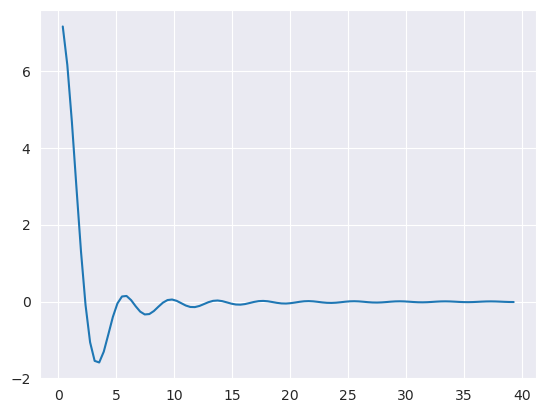

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig, ax = plt.subplots()
ax.plot(k, analytic_integral)

## Numeric Integral

In [12]:
from envelope_approximation.stress_energy_tensor.volume_integration import volume_integral
n = 10_000_000
numeric_integral = volume_integral(k_vecs, bubble_data, n, rng=np.random.default_rng(1))

In [13]:
numeric_integral

<xarray.DataArray (n_k: 100)>
array([ 7.15142110e+00-8.33031716e-04j,  6.14983940e+00-1.50387436e-03j,
        4.67398169e+00-1.88783682e-03j,  2.96964249e+00-1.92616268e-03j,
        1.30347364e+00-1.63862266e-03j, -9.12166692e-02-1.11744673e-03j,
       -1.05794908e+00-5.04411224e-04j, -1.54032913e+00+4.30000943e-05j,
       -1.58107082e+00+3.87913860e-04j, -1.29904049e+00+4.44088700e-04j,
       -8.51871599e-01+1.92777998e-04j, -3.94676121e-01-3.16832828e-04j,
       -4.53784615e-02-9.82600166e-04j,  1.35570371e-01-1.67499259e-03j,
        1.47913480e-01-2.26613238e-03j,  3.85374917e-02-2.65493053e-03j,
       -1.21579928e-01-2.78271552e-03j, -2.62695070e-01-2.63695134e-03j,
       -3.36575211e-01-2.24424211e-03j, -3.26826999e-01-1.65672694e-03j,
       -2.47899135e-01-9.37322137e-04j, -1.34866820e-01-1.48723306e-04j,
       -2.85319742e-02+6.51092309e-04j,  3.88594324e-02+1.40711717e-03j,
        5.29141432e-02+2.06231498e-03j,  1.91861525e-02+2.55386620e-03j,
       -4.15784565e-02+2.81483012e-03j, -1.02556332e-01+2.78330957e-03j,
       -1.40748135e-01+2.41803522e-03j, -1.44288724e-01+1.71614148e-03j,
       -1.15056623e-01+7.26951708e-04j, -6.62841649e-02-4.44342741e-04j,
       -1.65732113e-02-1.64695053e-03j,  1.72314309e-02-2.70861186e-03j,
        2.57458130e-02-3.46910025e-03j,  9.52522431e-03-3.81512070e-03j,
       -2.21921636e-02-3.70729078e-03j, -5.56506054e-02-3.19128985e-03j,
       -7.79053124e-02-2.38915116e-03j, -8.13376200e-02-1.47200051e-03j,
...
       -3.33593224e-02-2.80201018e-04j, -2.08954174e-02-4.96590159e-04j,
       -6.47367571e-03-6.07729743e-04j,  4.88407098e-03-5.96396739e-04j,
        9.62416465e-03-4.55278030e-04j,  6.83270630e-03-1.92962383e-04j,
       -1.62957587e-03+1.59065113e-04j, -1.20084767e-02+5.42750444e-04j,
       -2.01650451e-02+8.77401425e-04j, -2.31200614e-02+1.07337057e-03j,
       -2.00672264e-02+1.05401195e-03j, -1.25181756e-02+7.80588882e-04j,
       -3.58168199e-03+2.72262726e-04j,  3.30261435e-03-3.86755153e-04j,
        5.67408198e-03-1.05796185e-03j,  2.91633378e-03-1.57719458e-03j,
       -3.61765340e-03-1.79524038e-03j, -1.12249582e-02-1.61986431e-03j,
       -1.69443618e-02-1.04694143e-03j, -1.86868669e-02-1.70404283e-04j,
       -1.59798697e-02+8.33804265e-04j, -1.00654424e-02+1.74715833e-03j,
       -3.34717609e-03+2.36161471e-03j,  1.57615397e-03+2.53202461e-03j,
        2.90822323e-03+2.21318678e-03j,  3.07502317e-04+1.47086452e-03j,
       -5.03678024e-03+4.63451606e-04j, -1.09107098e-02-6.00528068e-04j,
       -1.49513451e-02-1.51687189e-03j, -1.55495578e-02-2.13651210e-03j,
       -1.24405172e-02-2.39844072e-03j, -6.77155962e-03-2.33611964e-03j,
       -6.39781221e-04-2.05688344e-03j,  3.71051971e-03-1.70192522e-03j,
        4.72072900e-03-1.39997146e-03j,  2.07114931e-03-1.22903716e-03j,
       -3.24048918e-03-1.19742371e-03j, -9.30728251e-03-1.24854306e-03j,
       -1.40394948e-02-1.28643291e-03j, -1.59288166e-02-1.21247748e-03j])
Coordinates:
  * n_k      (n_k) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 95.0 96.0 97.0 98.0 99.0

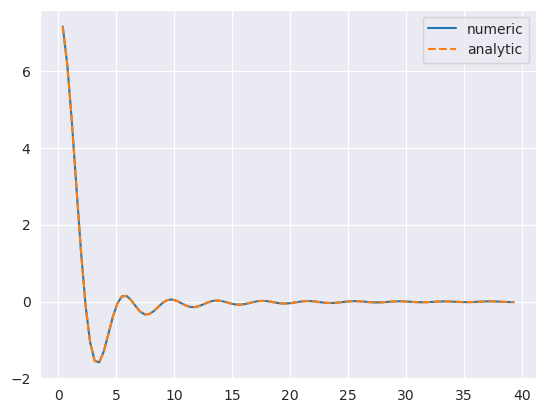

In [14]:

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig, ax = plt.subplots()
ax.plot(k, numeric_integral.pipe(np.real), label='numeric')
ax.plot(k, analytic_integral, label='analytic', linestyle='--')
ax.legend()

### zoom in on ends

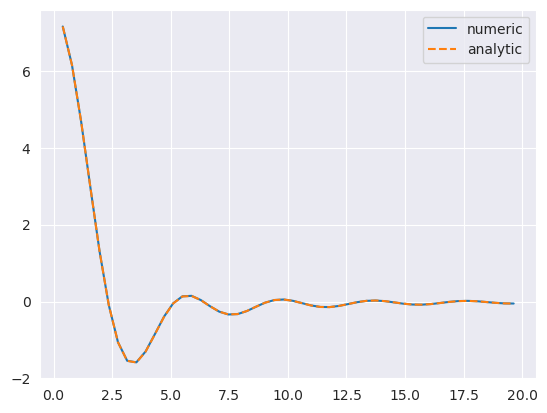

In [15]:

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig, ax = plt.subplots()
ax.plot(k.where(k < 20), numeric_integral.pipe(np.real).where(k < 20), label='numeric')
ax.plot(k.where(k < 20), analytic_integral.where(k < 20), label='analytic', linestyle='--')
ax.legend()

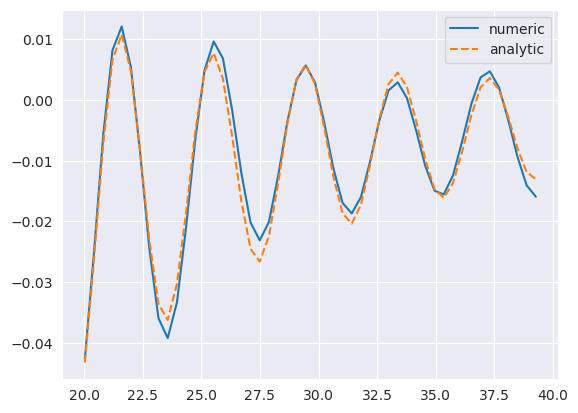

In [16]:

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig, ax = plt.subplots()
ax.plot(k.where(k > 20), numeric_integral.pipe(np.real).where(k > 20), label='numeric')
ax.plot(k.where(k > 20), analytic_integral.where(k > 20), label='analytic', linestyle='--')
ax.legend()